In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

TEN = 10
%matplotlib notebook

In [5]:
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',one_hot=True)


Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [6]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [9]:
sess = tf.InteractiveSession()

In [11]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

y = 3 (Dress)


<IPython.core.display.Javascript object>


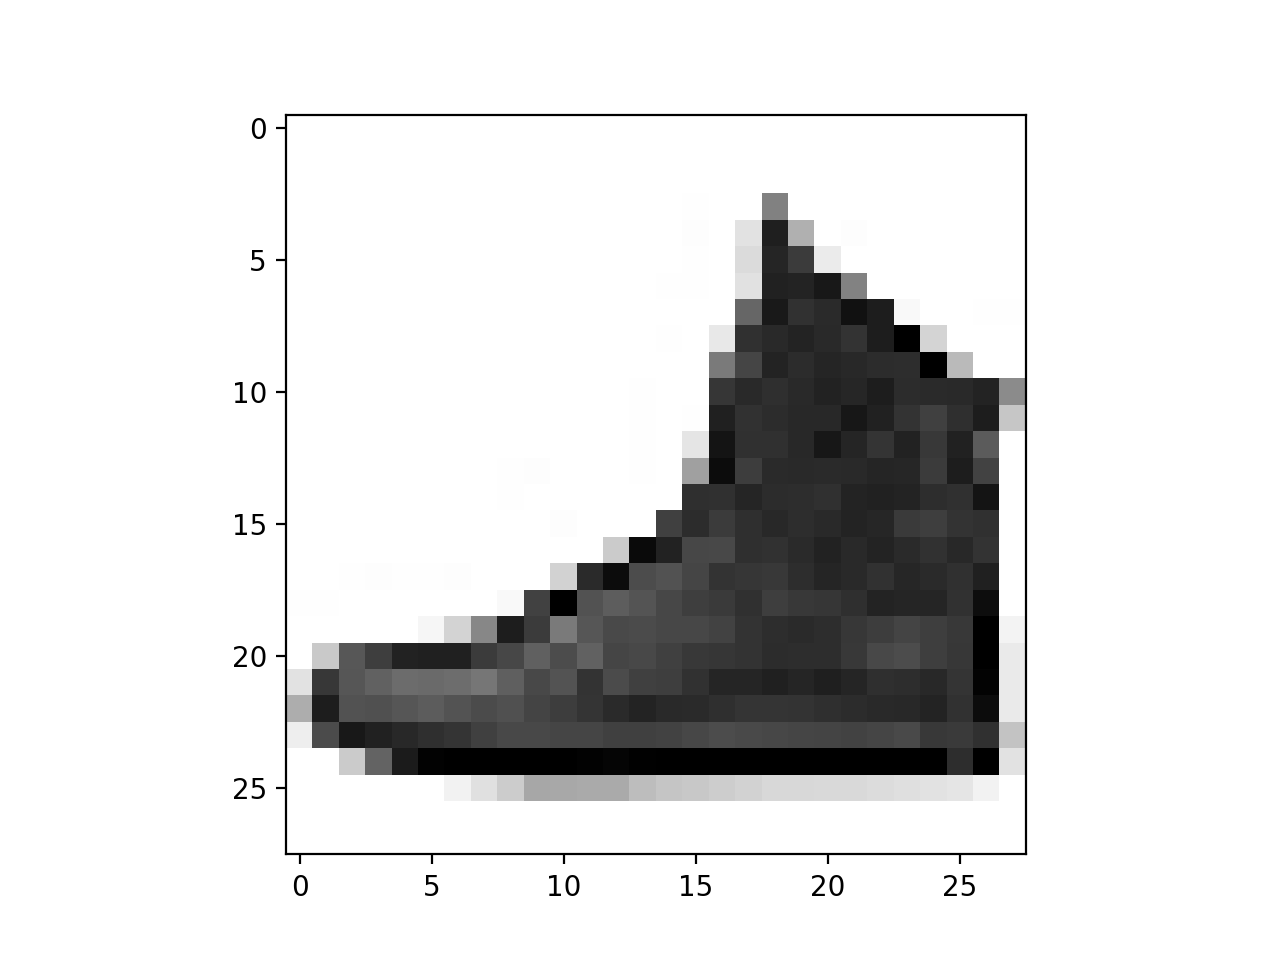

In [14]:
# Sample 1
# Get 28x28 image
sample_1 = fashion_mnist.train.images[47].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.train.labels[47] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

y = 7 (Sneaker)


<IPython.core.display.Javascript object>


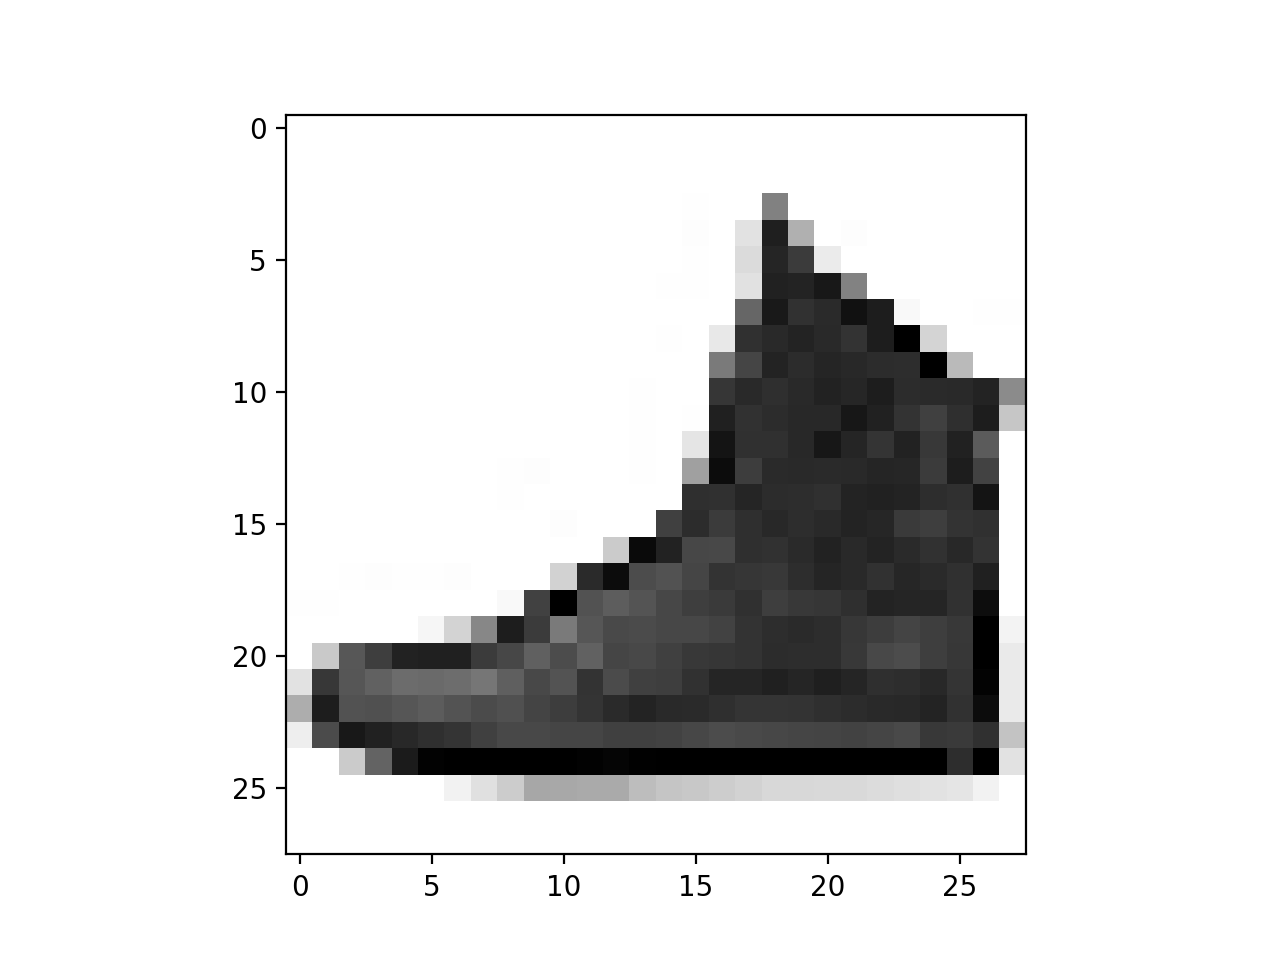

In [16]:
# Sample 2
# Get 28x28 image
sample_2 = fashion_mnist.train.images[23].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(fashion_mnist.train.labels[23] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')

We will build a 3-layer feedforward neural network with 128 units in each hidden layer. Both hidden layers will compute a linear function which is then passed into a ReLU activation function. Finally, we will use a Softmax function on the output from our network, to create 10 outputs (1 output for each target class).

In [17]:
def data_shuffling(data):
    feature_columns = [tf.feature_column.numeric_column("pixels", shape=784)]
    return feature_columns
    
    

In [22]:
feature_columns = data_shuffling(fashion_mnist)
logdir = "/tmp/fashion_model"

In [33]:
#Linear Classifier
classifier = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=10,model_dir=logdir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_session_config': None, '_task_type': 'worker', '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_num_ps_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f91fc1ba6d8>, '_save_checkpoints_steps': None, '_task_id': 0, '_is_chief': True, '_num_worker_replicas': 1, '_master': '', '_model_dir': '/tmp/fashion_model', '_service': None, '_log_step_count_steps': 100}


In [38]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={'pixels': feature_columns},y=fashion_mnist.train.labels,shuffle=True)

In [40]:
def input_fn(dataset):
    def _fn():
        features = {'pixels': tf.constant(dataset.data)}
        label = tf.constant(dataset.target)
        return features, label
    return _fn

print(input_fn(fashion_mnist)())

AttributeError: 'Datasets' object has no attribute 'data'

In [36]:
num_steps = 1000
classifier.train(input_fn=train_input_fn,steps=num_steps)
accuracy_score = classifier.evaluate(input_fn=eval_input_fn)['accuracy']

ValueError: Mismatched label shape. Classifier configured with n_classes=1.  Received 10. Suggested Fix: check your n_classes argument to the estimator and/or the shape of your label.